In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle
import datetime

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [2]:
results_file = '/home/ngr4/project/wearables/results/InceptionTimeRegressor_v1_GA.csv'

In [3]:
df = pd.read_csv(results_file, index_col=0)
# remove dev experiments
df = df.loc[df['trial'] > 0, :]

In [4]:
df.iloc[0:6, :].std()

/tmp/ipykernel_224453/2770358139.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[0:6, :].std()


trial         1.870829
eval_test     0.200241
loss_test     7.215296
bst_epoch    10.990905
dtype: float64

In [5]:
df.mean()

/tmp/ipykernel_224453/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


trial         3.500000
eval_test     8.293266
loss_test    93.011798
bst_epoch    56.750000
dtype: float64

In [6]:
df.std()

/tmp/ipykernel_224453/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


trial         1.783765
eval_test     0.186506
loss_test     6.049970
bst_epoch    13.115743
dtype: float64

In [7]:
import sys
sys.path.append('/home/ngr4/project/wearables/scripts')
import train as weartrain

trainer = weartrain.InceptionTimeRegressor_trainer()

In [9]:
trainer.model

InceptionTime(
  (block): InceptionBlock(
    (inception_layers): ModuleList(
      (0): Inception(
        (conv_layers): ModuleList(
          (0): Conv1d(1, 16, kernel_size=(60,), stride=(1,), padding=same)
          (1): Conv1d(1, 16, kernel_size=(30,), stride=(1,), padding=same)
          (2): Conv1d(1, 16, kernel_size=(15,), stride=(1,), padding=same)
        )
        (maxpool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
        (conv): Conv1d(1, 16, kernel_size=(1,), stride=(1,))
        (BN): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (1): Inception(
        (bottleneck): Conv1d(64, 8, kernel_size=(1,), stride=(1,), padding=same)
        (conv_layers): ModuleList(
          (0): Conv1d(8, 16, kernel_size=(60,), stride=(1,), padding=same)
          (1): Conv1d(8, 16, kernel_size=(30,), stride=(1,), padding=same)
          (2): Conv1d(8, 16, kernel_size=(15,), stride=(

In [10]:
knn_exp = pd.read_csv('/home/ngr4/project/wearables/results/all_knn_210803.csv', index_col=0)

In [15]:
knn_exp.loc[knn_exp['task']=='GA', :].std()

/tmp/ipykernel_21704/2277459759.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  knn_exp.loc[knn_exp['task']=='GA', :].std()


Unnamed: 0    314.875637
n_trial         3.027650
eval_train      0.000000
eval_val        0.000000
eval_test       0.000000
dtype: float64

In [19]:
import ast

In [21]:
# plot training run 
loss_train = ast.literal_eval(df.iloc[8, 5])
loss_val = ast.literal_eval(df.iloc[8, 7])



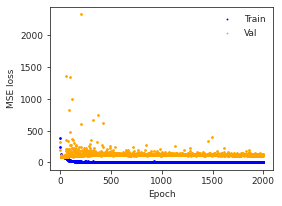

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.scatter(np.arange(len(loss_train)), loss_train, c='blue', s=3, label='Train', rasterized=True)
ax.scatter(np.arange(len(loss_val)), loss_val, c='orange', s=3, label='Val', rasterized=True)
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE loss')

fig.savefig('/home/ngr4/project/wearables/results/results_InceptionTime_dev_scatter_bst_losstrain_nopatience.png', bbox_inches='tight', dpi=600)

In [10]:
# make other plots
import sys
sys.path.append('/home/ngr4/project/wearables/scripts')
import train as weartrain

trainer = weartrain.InceptionTimeRegressor_trainer(trial=0, 
                                                       patience=None, n_epochs=2000,
                                                       batch_size=32)

In [11]:
res = trainer.eval_test(modelpkl='/home/ngr4/project/wearables/model_zoo/61-InceptionTime_GA4.pkl')

/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/conv.py:294: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/Convolution.cpp:660.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Test set eval:
  bst epoch: None
  <loss_test>=88.6715
  acc_test   =8.0414


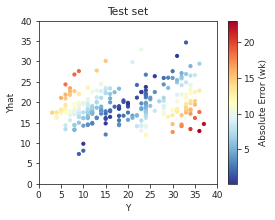

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

im = ax.scatter(res['y'], res['yhat'], c=(res['yhat']-res['y']).abs(), s=10, cmap='RdYlBu_r', rasterized=True)
cbar = fig.colorbar(im)
cbar.set_label('Absolute Error (wk)')
ax.set_title('Test set')
ax.set_xlabel('Y')
ax.set_ylabel('Yhat')
ax.set_xlim([0, 40])
ax.set_ylim([0, 40])
ax.set_xticks(ax.get_yticks())

fig.savefig('/home/ngr4/project/wearables/results/results_InceptionTime_dev_scatter_bst_nopatience_yhatVy.png', bbox_inches='tight', dpi=600)

In [21]:
trainer.dataloaders['md_test'].reset_index()

,index,pid,GA,record_id,age_enroll,marital,gestage_by,insur,ethnicity,race,...,edinb1_1trim,edinb2_1trim,edinb3_1trim,edinb4_1trim,edinb5_1trim,edinb6_1trim,edinb7_1trim,edinb8_1trim,edinb9_1trim,edinb10_1trim
0,13,1008,31.0,1008,21.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
1,14,1008,4.0,1008,21.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
2,19,1011,12.0,1011,20.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0
3,20,1011,18.0,1011,20.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0
4,21,1011,26.0,1011,20.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2534,2591,25.0,2591,29.0,2.0,2.0,3.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
246,2535,2591,36.0,2591,29.0,2.0,2.0,3.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
247,2565,2609,23.0,2609,32.0,2.0,2.0,4.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
248,2566,2609,33.0,2609,32.0,2.0,2.0,4.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


In [73]:
md_merged = trainer.dataloaders['md_test'].reset_index().merge(pd.DataFrame({'Absolute Error':(res['yhat']-res['y']).abs().numpy(),
                                                                             'yGA':res['y'].numpy(), 'yhatGA':res['yhat'].numpy()}, index=res['md_idx'].numpy()), left_index=True, right_index=True)

In [36]:
dt = md_merged.loc[:, ['GA', 'age_enroll', 'gestational_diabetes', 'Absolute Error', 'premature_birth1']]
for k in dt.columns:
    if dt[k].dtype == object :
        dt[k] = dt[k].astype(float)

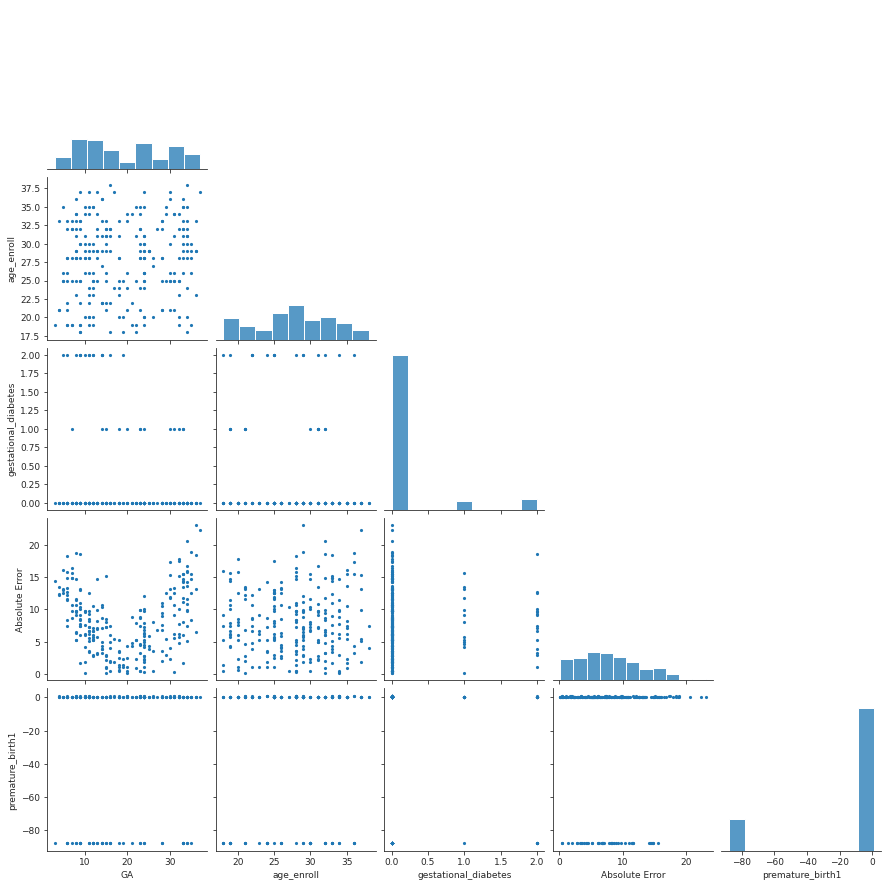

In [46]:
p = sns.pairplot(dt, plot_kws={'linewidth':0, 's':10}, corner=True, diag_kind='hist')
p.savefig('/home/ngr4/project/wearables/results/results_InceptionTime_dev_md_errorCORRscatterplots.png')

In [35]:
dt['gestational_diabetes'].dtype == object

True

In [83]:
pid = md_merged.groupby('pid').count().reset_index()
pid = pid.loc[(pid['index']>1), 'pid'].to_list()
dt = md_merged.loc[md_merged['pid'].isin(pid), :]

In [ ]:
# get color
import matplotlib
norm = matplotlib.colors.Normalize(vmin=dt['GA'].min(), vmax=dt['GA'].max())
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdYlBu_r)
dt['GAcolor'] = [mapper.to_rgba(v) for v in dt['GA']]

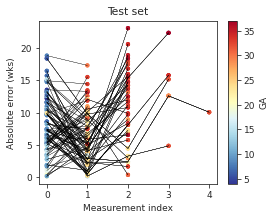

In [101]:
# metadata with multiple GAs, color by 
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for pid in dt['pid']:
    dtt = dt.loc[dt['pid']==pid, :].sort_values(by='GA').reset_index()
    for i in range(dtt.shape[0]):
        if not i+1==dtt.shape[0]:
            ax.plot([i, i+1], [dtt.loc[i, 'Absolute Error'], dtt.loc[i+1, 'Absolute Error']], linewidth=0.25, color='black')
            ax.scatter([i, i+1], [dtt.loc[i, 'Absolute Error'], dtt.loc[i+1, 'Absolute Error']], s=10, c=[dtt.loc[i, 'GAcolor'], dtt.loc[i+1, 'GAcolor']])
ax.set_xlabel('Measurement index')
ax.set_ylabel('Absolute error (wks)')
ax.set_title('Test set')
cbar = fig.colorbar(mapper)
cbar.set_label('GA')

fig.savefig('/home/ngr4/project/wearables/results/results_InceptionTime_dev_paired_measurement_error.png', bbox_inches='tight', dpi=600)

In [96]:
# get color
import matplotlib
norm = matplotlib.colors.Normalize(vmin=dt['GA'].min(), vmax=dt['GA'].max())
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdYlBu_r)
dt['GAcolor'] = [mapper.to_rgba(v) for v in dt['GA']]

/tmp/ipykernel_29275/2841765865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['GAcolor'] = [mapper.to_rgba(v) for v in dt['GA']]


In [12]:
trainer.model

InceptionTime(
  (block): InceptionBlock(
    (inception_layers): ModuleList(
      (0): Inception(
        (conv_layers): ModuleList(
          (0): Conv1d(1, 16, kernel_size=(60,), stride=(1,), padding=same)
          (1): Conv1d(1, 16, kernel_size=(30,), stride=(1,), padding=same)
          (2): Conv1d(1, 16, kernel_size=(15,), stride=(1,), padding=same)
        )
        (maxpool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
        (conv): Conv1d(1, 16, kernel_size=(1,), stride=(1,))
        (BN): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (1): Inception(
        (bottleneck): Conv1d(64, 8, kernel_size=(1,), stride=(1,), padding=same)
        (conv_layers): ModuleList(
          (0): Conv1d(8, 16, kernel_size=(60,), stride=(1,), padding=same)
          (1): Conv1d(8, 16, kernel_size=(30,), stride=(1,), padding=same)
          (2): Conv1d(8, 16, kernel_size=(15,), stride=(